In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randn(1500,2)*5
r = np.sqrt(X[:,0]**2 + X[:,1]**2)

In [3]:
Ys = np.zeros(1500)
for i in range(0,1500):
    if r[i]>5:
        Ys[i] = 1
    if r[i]<2:
        Ys[i] = 0

In [4]:
s = Ys == 0
t = Ys == 1
r = Ys == 2

In [5]:
Y = np.matrix(np.column_stack((s,t,r)).astype(int))


In [6]:
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)
# w1 = np.matrix(np.random.randn(2,8))
# w2 = np.matrix(np.random.randn(8,10))
# w3 = np.matrix(np.random.randn(10,8))
# w4 = np.matrix(np.random.randn(8,3))
# b1 = np.matrix(np.random.randn(1,8))
# b2 = np.matrix(np.random.randn(1,10))
# b3 = np.matrix(np.random.randn(1,8))
# b4 = np.matrix(np.random.randn(1,3))
# w1 = w1best
# w2 = w2best
# b1 = b1best
# b2 = b2best
# errbest = 10000
errs = []
lr = .000001
for i in range(0,10):
    A1 = X@w1 + b1
    Z1 = np.tanh(A1)
    A2 = Z1@w2 + b2
    Z2 = np.tanh(A2)
    A3 = Z2@w3 + b3
    Z3 = np.tanh(A1)
    A4 = Z3@w4 + b4
    phat = softmax(A4)
    d4 = (phat - Y)
    w4 = w4 - lr*Z3.T@d4
    b4 = b4 - lr*np.sum(d4,axis = 0)
    d3 = np.multiply(d4@w4.T, 1 - np.multiply(Z3,Z3))
    w3 = w3 - lr*Z2.T@d3
    b3 = b3 - lr*np.sum(d3,axis = 0)
    d2 = np.multiply(d3@w3.T, 1 - np.multiply(Z2,Z2))
    w2 = w2 - lr*Z1.T@d2
    b2 = b2 - lr*np.sum(d2,axis = 0)
    d1 = np.multiply(d2@w2.T, 1 - np.multiply(Z1,Z1))
    w1 = w1 - lr*X.T@d1
    b1 = b1 - lr*np.sum(d1,axis = 0)
    GCEC = -np.sum(np.multiply(Y,np.log(phat)))
    errs.append(GCEC)

NameError: name 'w1' is not defined

In [7]:
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)
def tander(Z):
    return 1-np.multiply(Z,Z)
def GCEC(Y,Yhat):
    return -np.sum(np.multiply(Y,np.log(Yhat)))/len(Y[:,0])
class TSNN:
    def __init__(self, nodes = [5,3,6,3],indims = 2,
                 activation = np.tanh, actder = tander,
                 outputactivation = softmax, cost = GCEC):
        self.layers = len(nodes)
        self.indims = indims
#         self.outdims = outdims
        self.nodes = nodes
        self.actder = actder
        self.costfunc = cost
        if type(activation) == type([]):
            self.activation = activation
        else:
            self.activation = []
            for i in range(0,len(nodes)):
                self.activation.append(activation)
            print(self.activation)
        self.outputactivation = outputactivation
    def weightInitialization(self):
        self.weights = {}
        self.biases = {}
        self.weights['w0']=np.random.randn(self.indims,self.nodes[0])
        self.biases['b0'] = np.random.randn(1,self.nodes[0])
        for i in range(1,self.layers):
            self.weights['w'+str(i)] = np.random.randn(self.nodes[i-1],self.nodes[i])
            self.biases['b'+str(i)] = np.random.randn(1,self.nodes[i])
    def predict(self, X):
        self.Z = {}
        self.Z['0'] = X
        for i in range(1,len(self.nodes)):
            self.Z[str(i)] = self.activation[i-1](
                self.Z[str(i-1)]@self.weights['w'+str(i-1)]
                +self.biases['b'+str(i-1)])
        self.predictions = self.outputactivation(
            self.Z[str(len(self.nodes)-1)]@self.weights['w'+str(
                self.layers-1)] + self.biases['b'+str(self.layers- 1)])
        return self.predictions
    def train(self, X,Y, epochs = 1000, learningRate = .00001):
        errs = []
        for i in range(0,epochs):
            js = np.linspace(len(self.weights)-1,0,len(self.weights))
            d = self.predict(X) - Y
            for j in range(len(self.weights)-1,-1,-1):
                self.weights['w'+str(j)] = self.weights['w'+str(j)]- learningRate*self.Z[str(j)].T@d
                self.biases['b'+str(j)] = self.biases['b'+str(j)]\
                - learningRate*np.sum(d,axis = 0)
                d = np.multiply(d@self.weights['w'+str(j)].T,
                                self.actder(self.Z[str(j)]))
            errs.append(self.costfunc(Y,self.predict(X)))
        plt.plot(errs)

In [191]:
model = TSNN( indims = 2, nodes = [10,10,3],activation = np.tanh, actder = tander)
model.weightInitialization()

[<ufunc 'tanh'>, <ufunc 'tanh'>, <ufunc 'tanh'>]


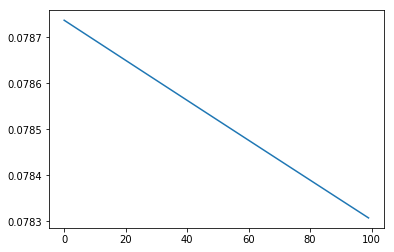

In [326]:
model.train(X,Y)

In [71]:
fakex = np.linspace(-4,4,1000)
fakex2 = np.linspace(-4,4,1000)
fakeX = np.column_stack((fakex,fakex2))
A1 = X@w1 + b1
Z1 = np.tanh(A1)
A2 = Z1@w2 + b2
Z2 = np.tanh(A2)
A3 = Z2@w3 + b3
Z3 = np.tanh(A1)
A4 = Z3@w4 + b4
phat = A4

In [59]:
ypred = np.round(phat)

r = np.argmax(ypred, axis = 1).T.tolist()[0]
fakeX = np.random.uniform(-5,20,(3000000,2))
newx = np.matrix(fakeX[np.where(abs(np.tanh(fakeX@w1 + b1)@w2+b2)<.01)[0]])
colors = ['blue','red',"green"]
z = [colors[i] for i in r]
plt.scatter(X[:,0].tolist(),X[:,1].tolist(),
            c = z,alpha = .5, s = 4)
plt.xlim(-5,6)
plt.ylim(-5,10)
plt.scatter(newx[:,0].T.tolist()[0],
            newx[:,1].T.tolist()[0],c = "black", s = .5)

NameError: name 'tanh' is not defined

In [137]:
newphat =np.eye(phat.shape[1])[np.argmax(phat,axis = 1)][:,0,:]

In [138]:
np.sum(np.multiply(np.rint(newphat),Y), axis = 0)/np.sum(Y, axis = 0)

matrix([[0.5785124 , 0.99550056, 0.37007874]])

In [130]:
Ynew = np.argmax(Y, axis = 1)

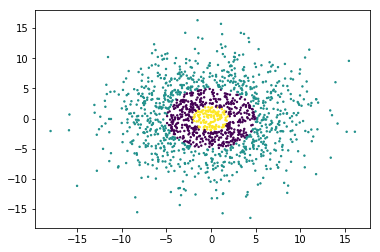

In [134]:
plt.scatter(X[:,0],X[:,1], c = Ynew.T.tolist()[0], s = 2)

In [ ]:
print(np.mean(np.rint(phatnew) == Ynew))

In [327]:
Ynew = np.argmax(Y, axis = 1)
newphat = np.eye(model.predict(X).shape[1])[np.argmax(model.predict(X),axis = 1)][:,0,:]
print(np.mean(newphat == Ynew))
print(np.sum(np.multiply(np.rint(newphat),Y), axis = 0)/np.sum(Y, axis = 0))

0.4126666666666667
[[0.97933884 0.99325084 0.94488189]]
